In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense





In [2]:
df = pd.read_csv('GoogleStockPrice.csv') 

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

data = df[['Close']].values  




In [3]:
# Step 2: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


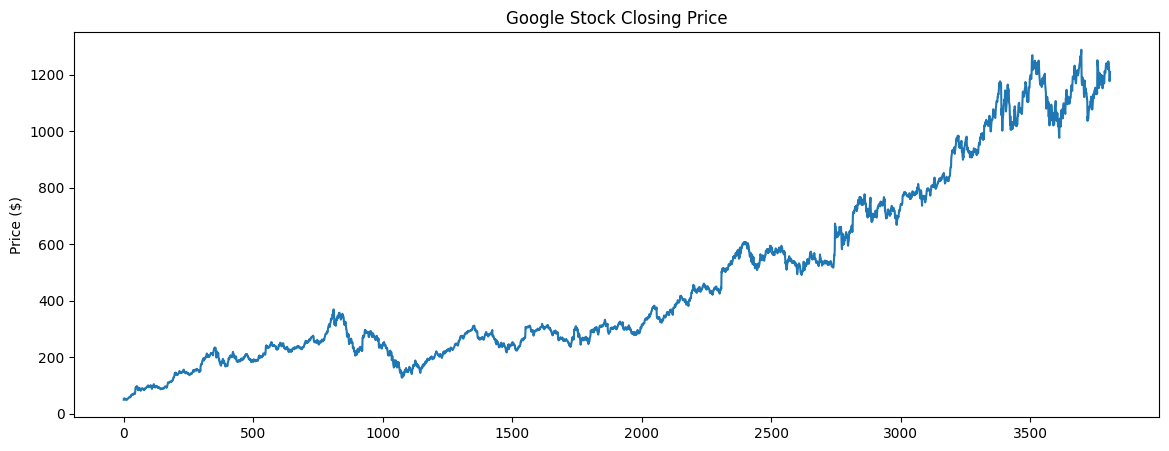

In [4]:
df['Close'].plot(figsize=(14,5), title='Google Stock Closing Price')
plt.ylabel("Price ($)")
plt.show()

In [5]:

def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_data, time_steps)



In [6]:
# Step 4: Split into Train/Test
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]



In [7]:
# Step 5: Define RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=32, verbose=1)



Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.2319e-04 - val_loss: 0.0048
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 9.4980e-05 - val_loss: 0.0025
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 8.1356e-05 - val_loss: 0.0016
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.4794e-05 - val_loss: 0.0019
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.0353e-05 - val_loss: 0.0015
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.1896e-05 - val_loss: 0.0010
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.3040e-05 - val_loss: 8.7586e-04
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.6599e-05 - val_loss: 0.0013
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0784e-05 - val_loss: 5.9234e-04
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.2255e-05 - val_loss: 7.7515e-04
Epoch 12/20

In [9]:
# Step 7: Predictions and Inverse Transform
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [10]:

# Step 8: Evaluate
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")



Mean Squared Error: 431.2573
Mean Absolute Error: 15.5143


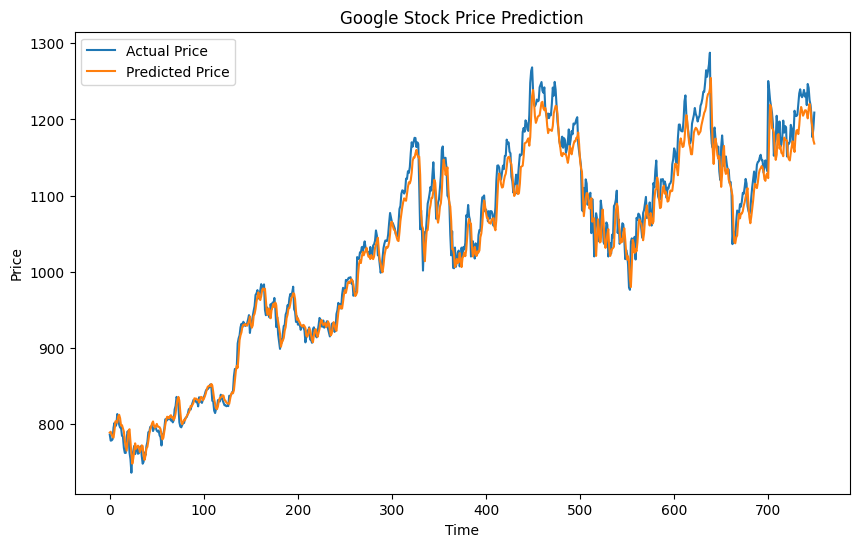

In [11]:
# Step 9: Plot Predictions
plt.figure(figsize=(10,6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(y_pred_inv, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()

plt.show()